# Homework: Grid search for hyperparameter tuning



## Introduction

For models with a single hyperparameter controlling bias-variance (for example: $k$ in $k$ nearest neighbors), we used Scikit-learn's `KFoldCV` to test a range of values for the hyperparameter, and to select the best one. 



When we have *multiple* hyperparameters to tune, we can use `GridSearchCV` to select the best *combination* of them.

For example, in this week's lesson (in the notebook on bias and variance of SVM), we saw three ways to tune the bias-variance of an SVM classifier:

* Changing the kernel
* Changing $C$, the inverse of the regularization penalty weight
* For an RBF kernel, changing $\gamma$, the inverse of the kernel bandwidth


To get the best performance from an SVM classifier, we need to find the best *combination* of these hyperparameters.

This notebook shows how to use `GridSearchCV` to tune an SVM classifier.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Get the data

We will work with a subset of the MNIST handwritten digits data. First, we will get the data, and assign a small subset of samples to training and test sets.

In [ ]:
from sklearn.datasets import fetch_openml

In [ ]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True )

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                     train_size=10000, test_size=3000)

## Run grid search

Here is the initial parameter grid that was given:

In [ ]:
param_grid = [
  {'C': [0.1, 1000], 'kernel': ['linear']},
  {'C': [0.1, 1000], 'gamma': [0.01, 0.0001], 'kernel': ['rbf']},
 ]
param_grid

[{'C': [0.1, 1000], 'kernel': ['linear']},
 {'C': [0.1, 1000], 'gamma': [0.01, 0.0001], 'kernel': ['rbf']}]

I added `return_train_score=True` to my `GridSearchSV` so that it will show me training scores as well:

In [ ]:
clf = GridSearchCV(SVC(), param_grid, cv=3, refit=True, verbose=100, n_jobs=-1, return_train_score=True)
%time clf.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   37.3s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   37.7s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed: 15.5min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed: 15.7

GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'C': [0.1, 1000], 'kernel': ['linear']},
                         {'C': [0.1, 1000], 'gamma': [0.01, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=100)

Here are the results:

In [ ]:
pd.DataFrame(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,10.165773,0.068495,8.739724,0.098837,0.1,linear,NaN,"{'C': 0.1, 'kernel': 'linear'}",0.909718,0.909991,0.906691,0.9088,0.001496,1,1.000000,1.000000,1.000000,1.0000,0.000000
1,10.179685,0.090268,8.764332,0.120978,1000,linear,NaN,"{'C': 1000, 'kernel': 'linear'}",0.909718,0.909991,0.906691,0.9088,0.001496,1,1.000000,1.000000,1.000000,1.0000,0.000000
2,106.078676,0.123370,32.600939,1.539681,0.1,rbf,0.01,"{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}",0.110678,0.111011,0.110711,0.1108,0.000150,3,0.110861,0.110694,0.110844,0.1108,0.000075
3,109.104700,0.462223,33.869316,0.741779,0.1,rbf,0.0001,"{'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}",0.110678,0.111011,0.110711,0.1108,0.000150,3,0.110861,0.110694,0.110844,0.1108,0.000075
4,107.353718,0.248170,32.214555,1.010085,1000,rbf,0.01,"{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}",0.110678,0.111011,0.110711,0.1108,0.000150,3,1.000000,1.000000,1.000000,1.0000,0.000000
5,109.570730,0.132047,33.631680,0.748126,1000,rbf,0.0001,"{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}",0.110678,0.111011,0.110711,0.1108,0.000150,3,1.000000,1.000000,1.000000,1.0000,0.000000


To inform our search, we will use our understanding of how SVMs work, and especially how the $C$ and $\gamma$ parameters control the bias and variance of the SVM.

### Extending our search: the linear kernel

Let's tackle the linear SVM first, since it's faster to fit. We didn't see any change in the accuracy when we vary $C$. So, we should extend the range of $C$ over which we search.

I'll try higher and lower values of $C$, to see what happens. 

(I'll decrease `cv` to 2 at this stage, so that we fit faster.)

In [ ]:
param_grid = [
  {'C': [1e-6, 1e-4, 1e-2, 1e2, 1e4, 1e6], 'kernel': ['linear']},
 ]
param_grid

[{'C': [1e-06, 0.0001, 0.01, 100.0, 10000.0, 1000000.0], 'kernel': ['linear']}]

In [ ]:
clf = GridSearchCV(SVC(), param_grid, cv=2, refit=True, verbose=100, n_jobs=-1, return_train_score=True)
%time clf.fit(X_train, y_train)

Fitting 2 folds for each of 6 candidates, totalling 12 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   30.0s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   30.4s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:   58.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   58.6s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  10 out of  12 | elapsed:  2.4min remaining:   28.5s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  2.8min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  2.8min finished
CPU times: user 19.4 s, sys: 77 ms, total: 19.5 s
Wall time: 3min 9s


GridSearchCV(cv=2, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'C': [1e-06, 0.0001, 0.01, 100.0, 10000.0, 1000000.0],
                          'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=100)

In [ ]:
pd.DataFrame(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,6.784811,0.052599,11.242024,0.085134,1e-06,linear,"{'C': 1e-06, 'kernel': 'linear'}",0.9228,0.9226,0.9227,0.0001,1,0.9726,0.975,0.9738,0.0012
1,6.446161,0.140616,10.843974,0.077022,0.0001,linear,"{'C': 0.0001, 'kernel': 'linear'}",0.9068,0.9090,0.9079,0.0011,2,1.0000,1.000,1.0000,0.0000
2,6.460444,0.100082,10.725705,0.031597,0.01,linear,"{'C': 0.01, 'kernel': 'linear'}",0.9068,0.9090,0.9079,0.0011,2,1.0000,1.000,1.0000,0.0000
3,6.478459,0.084877,10.920886,0.041838,100,linear,"{'C': 100.0, 'kernel': 'linear'}",0.9068,0.9090,0.9079,0.0011,2,1.0000,1.000,1.0000,0.0000
4,6.481479,0.179002,10.732354,0.047465,10000,linear,"{'C': 10000.0, 'kernel': 'linear'}",0.9068,0.9090,0.9079,0.0011,2,1.0000,1.000,1.0000,0.0000
5,6.455883,0.104936,10.709317,0.022217,1e+06,linear,"{'C': 1000000.0, 'kernel': 'linear'}",0.9068,0.9090,0.9079,0.0011,2,1.0000,1.000,1.0000,0.0000


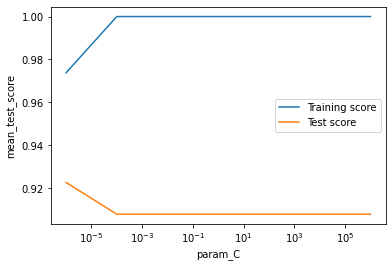

In [ ]:
sns.lineplot(data=pd.DataFrame(clf.cv_results_), x='param_C', y='mean_train_score', label="Training score");
sns.lineplot(data=pd.DataFrame(clf.cv_results_), x='param_C', y='mean_test_score', label="Test score");
plt.xscale('log');

We can see that for the linear kernel, a large value of $C$ leads to overfitting - the training score is very high, but the validation score is lower.  

For the smallest value of $C$ that we tested, we got a lower training score, but a higher validation score. 

(Even if we had only the validation score - we could still see that the test score improves when we decrease $C$. We can infer from this that the model was overfitting, since we know that decreasing $C$ also decreases variance.)

We have a better value of $C$ than anything in the initial parameter grid, but we don't want to stop our search when the best value we have is at the edge of the search space - what if there's a better value just beyond it? Let's see what happens when we decrease $C$ even more:

In [ ]:
param_grid = [
  {'C': [1e-9, 1e-7, 1e-5], 'kernel': ['linear']},
 ]
param_grid

[{'C': [1e-09, 1e-07, 1e-05], 'kernel': ['linear']}]

In [ ]:
clf = GridSearchCV(SVC(), param_grid, cv=2, refit=True, verbose=100, n_jobs=-1, return_train_score=True)
%time clf.fit(X_train, y_train)

Fitting 2 folds for each of 3 candidates, totalling 6 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:  2.8min remaining:  1.4min
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  3.3min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  3.3min finished
CPU times: user 31.8 s, sys: 68.9 ms, total: 31.9 s
Wall time: 3min 48s


GridSearchCV(cv=2, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'C': [1e-09, 1e-07, 1e-05], 'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=100)

In [ ]:
pd.DataFrame(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,55.182028,0.027487,34.134862,0.020281,1e-09,linear,"{'C': 1e-09, 'kernel': 'linear'}",0.3534,0.3528,0.3531,0.0003,3,0.3558,0.3538,0.3548,0.0010
1,10.970605,0.015889,16.767236,0.011263,1e-07,linear,"{'C': 1e-07, 'kernel': 'linear'}",0.9164,0.9140,0.9152,0.0012,1,0.9388,0.9342,0.9365,0.0023
2,6.375779,0.125331,10.690668,0.004008,1e-05,linear,"{'C': 1e-05, 'kernel': 'linear'}",0.9098,0.9102,0.9100,0.0002,2,0.9984,0.9996,0.9990,0.0006


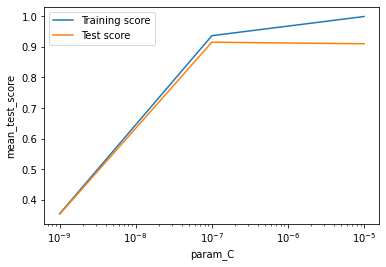

In [ ]:
sns.lineplot(data=pd.DataFrame(clf.cv_results_), x='param_C', y='mean_train_score', label="Training score")
sns.lineplot(data=pd.DataFrame(clf.cv_results_), x='param_C', y='mean_test_score', label="Test score")
plt.xscale('log');

When $C$ gets too small, the accuracy decreases again - this time, due to high bias. (The training and validation scores are both low.)

To summarize our findings for the linear kernel:

* $C$ less than `1e-7` underfits.
* $C$ greater than `1e-6` overfits.


### Extending our search: the RBF kernel

Now we consider the RBF kernel. 

In our first search, the accuracy of the RBF kernel is very poor. We may have high bias, high variance, (or both).


When $C=0.1$ in our first search, both training and validation scores were low. This suggests high bias.

When $C=1000$ in our first search, training scores were high and validation scores were low. This suggests high variance.

What next? We know from our discussion of bias and variance of SVMs that to combat overfitting, we can decrease $\gamma$ and/or decrease $C$.

For now, let's keep the higher value of $C$, and try to reduce the overfitting by decreasing $\gamma$.

In [ ]:
param_grid = [
  {'C': [1000], 'gamma': [1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11], 'kernel': ['rbf']},
 ]
param_grid

[{'C': [1000],
  'gamma': [0.0001, 1e-05, 1e-06, 1e-07, 1e-08, 1e-09, 1e-10, 1e-11],
  'kernel': ['rbf']}]

In [ ]:
clf = GridSearchCV(SVC(), param_grid, cv=2, refit=True, verbose=100, n_jobs=-1, return_train_score=True)
%time clf.fit(X_train, y_train)

Fitting 2 folds for each of 8 candidates, totalling 16 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done  14 out of  16 | elapsed:  8.5

GridSearchCV(cv=2, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'C': [1000],
                          'gamma': [0.0001, 1e-05, 1e-06, 1e-07, 1e-08, 1e-09,
                                    1e-10, 1e-11],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=100)

In [ ]:
pd.DataFrame(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,60.983977,0.081122,36.808250,0.026436,1000,0.0001,rbf,"{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}",0.1108,0.1108,0.1108,0.0000,8,1.0000,1.0000,1.0000,0.0000
1,59.353542,0.067806,36.218034,0.475368,1000,1e-05,rbf,"{'C': 1000, 'gamma': 1e-05, 'kernel': 'rbf'}",0.1808,0.1762,0.1785,0.0023,7,1.0000,1.0000,1.0000,0.0000
2,50.282296,0.271978,29.585545,0.310710,1000,1e-06,rbf,"{'C': 1000, 'gamma': 1e-06, 'kernel': 'rbf'}",0.9376,0.9362,0.9369,0.0007,2,1.0000,1.0000,1.0000,0.0000
3,8.531313,0.082250,13.892211,0.024032,1000,1e-07,rbf,"{'C': 1000, 'gamma': 1e-07, 'kernel': 'rbf'}",0.9532,0.9516,0.9524,0.0008,1,1.0000,1.0000,1.0000,0.0000
4,6.816029,0.102956,11.560646,0.111121,1000,1e-08,rbf,"{'C': 1000, 'gamma': 1e-08, 'kernel': 'rbf'}",0.9230,0.9214,0.9222,0.0008,3,1.0000,1.0000,1.0000,0.0000
5,6.699203,0.072538,11.314168,0.082578,1000,1e-09,rbf,"{'C': 1000, 'gamma': 1e-09, 'kernel': 'rbf'}",0.9192,0.9188,0.9190,0.0002,5,0.9842,0.9868,0.9855,0.0013
6,9.072353,0.027413,14.878082,0.250665,1000,1e-10,rbf,"{'C': 1000, 'gamma': 1e-10, 'kernel': 'rbf'}",0.9216,0.9204,0.9210,0.0006,4,0.9476,0.9470,0.9473,0.0003
7,20.991242,0.011936,26.086820,0.427457,1000,1e-11,rbf,"{'C': 1000, 'gamma': 1e-11, 'kernel': 'rbf'}",0.8958,0.8930,0.8944,0.0014,6,0.9058,0.8964,0.9011,0.0047


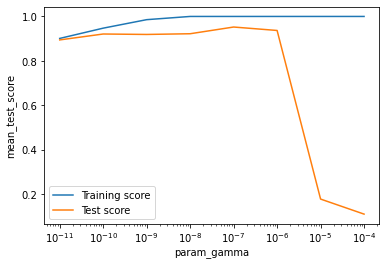

In [ ]:
sns.lineplot(data=pd.DataFrame(clf.cv_results_), x='param_gamma', y='mean_train_score', label="Training score")
sns.lineplot(data=pd.DataFrame(clf.cv_results_), x='param_gamma', y='mean_test_score', label="Test score")
plt.xscale('log');

Here, we see that (at least for $C=1000$), values of $\gamma$ greater than `1e-6` seem to overfit, while decreasing $\gamma$ lower than `1e-8` may underfit.

But we know that changing $C$ also affects the bias variance tradeoff! For different values of $C$, the best value of $\gamma$ will be different, and there may be a better *combination* of $C$ and $\gamma$ than any we have seen so far. We can try to increase and decrease $C$ to see if that improves the validation score.


## Putting it all together

Now that we have a better idea of where to search, we can set up our "final" search grid.  

We know that to find the best validation accuracy for the linear kernel, we should make sure our search space includes `1e-6` and `1e-7`. I chose to vary $C$ from `1e-8` to `1e-4`. (I want to make sure the best value is not at the edge of the search space, so that we can be sure there isn't a better value if we go lower/higher.)

We know that to find the best validation accuracy for the RBF kernel, we should make sure our search space includes $\gamma$ values around `1e-6` and `1e-7` when $C=1000$. For larger values of $C$, we expect that we'll get better results with smaller values of $\gamma$. For smaller values of $C$, we expect that we'll get better results with larger values of $\gamma$. I chose to vary $C$ from `1` to `1e6` and $\gamma$ from `1e-4` to `1e-11`.

That's a big search grid, so this takes a long time to fit! (And I made `cv=5` so it's even longer.) You don't have to search this many options, but I left this running overnight, so it wasn't a problem.

In [ ]:
param_grid = [
  {'C': [1e-8, 1e-7, 1e-6, 1e-5, 1e-4], 'kernel': ['linear']},
  {'C': [1, 1e2, 1e3, 1e4, 1e5, 1e6], 'gamma': [1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11], 'kernel': ['rbf']},
 ]
param_grid

[{'C': [1e-08, 1e-07, 1e-06, 1e-05, 0.0001], 'kernel': ['linear']},
 {'C': [1, 100.0, 1000.0, 10000.0, 100000.0, 1000000.0],
  'gamma': [0.0001, 1e-05, 1e-06, 1e-07, 1e-08, 1e-09, 1e-10, 1e-11],
  'kernel': ['rbf']}]

In [ ]:
clf = GridSearchCV(SVC(), param_grid, cv=5, refit=True, verbose=100, n_jobs=-1, return_train_score=True)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 53 candidates, totalling 265 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed: 10

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'C': [1e-08, 1e-07, 1e-06, 1e-05, 0.0001],
                          'kernel': ['linear']},
                         {'C': [1, 100.0, 1000.0, 10000.0, 100000.0, 1000000.0],
                          'gamma': [0.0001, 1e-05, 1e-06, 1e-07, 1e-08, 1e-09,
                                    1e-10, 1e-11],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=100)

## Review results

Finally, we'll print the results of the cross validation. For each combination of parameters, we can see:

* the validation score for each fold
* the mean validation score
* the standard deviation of the validation score
* the rank, by mean validation score

(in the report, the "test" scores are validation scores.)

In [ ]:
pd.DataFrame(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,60.166580,0.909460,16.629608,0.106543,1e-08,linear,NaN,"{'C': 1e-08, 'kernel': 'linear'}",0.8885,0.8830,0.8965,0.8830,0.8915,0.8885,0.005167,37,0.894500,0.895875,0.891250,0.894125,0.893500,0.893850,0.001515
1,23.653842,0.456598,9.594260,0.060920,1e-07,linear,NaN,"{'C': 1e-07, 'kernel': 'linear'}",0.9195,0.9230,0.9255,0.9145,0.9255,0.9216,0.004176,25,0.937125,0.936375,0.938000,0.937125,0.935750,0.936875,0.000762
2,14.394464,0.261189,6.319784,0.102760,1e-06,linear,NaN,"{'C': 1e-06, 'kernel': 'linear'}",0.9290,0.9230,0.9340,0.9280,0.9360,0.9300,0.004604,18,0.969375,0.970750,0.969500,0.969500,0.968750,0.969575,0.000650
3,13.908235,0.270714,5.992923,0.078964,1e-05,linear,NaN,"{'C': 1e-05, 'kernel': 'linear'}",0.9185,0.9060,0.9220,0.9140,0.9195,0.9160,0.005630,26,0.995625,0.996375,0.996000,0.996500,0.996125,0.996125,0.000306
4,13.879150,0.094706,5.991012,0.083557,0.0001,linear,NaN,"{'C': 0.0001, 'kernel': 'linear'}",0.9125,0.9085,0.9105,0.9095,0.9160,0.9114,0.002653,33,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
5,162.600643,1.412456,23.631425,0.081239,1,rbf,0.0001,"{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}",0.1110,0.1105,0.1105,0.1110,0.1110,0.1108,0.000245,46,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
6,160.308341,1.396896,22.798823,0.071173,1,rbf,1e-05,"{'C': 1, 'gamma': 1e-05, 'kernel': 'rbf'}",0.1750,0.1790,0.1780,0.1720,0.1760,0.1760,0.002449,45,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
7,123.843838,1.287827,17.159426,0.055630,1,rbf,1e-06,"{'C': 1, 'gamma': 1e-06, 'kernel': 'rbf'}",0.9515,0.9450,0.9525,0.9450,0.9450,0.9478,0.003444,11,0.999750,0.999875,0.999625,0.999750,0.999500,0.999700,0.000127
8,23.328569,0.405397,9.283969,0.109004,1,rbf,1e-07,"{'C': 1, 'gamma': 1e-07, 'kernel': 'rbf'}",0.9425,0.9465,0.9470,0.9415,0.9510,0.9457,0.003415,12,0.964500,0.964500,0.964875,0.966000,0.965750,0.965125,0.000632
9,46.951606,0.318877,14.916354,0.130793,1,rbf,1e-08,"{'C': 1, 'gamma': 1e-08, 'kernel': 'rbf'}",0.9055,0.9000,0.9110,0.8950,0.9110,0.9045,0.006261,34,0.911875,0.912250,0.910375,0.912250,0.910375,0.911425,0.000868


We get better accuracy with the RBF kernel, but if we wanted to use the linear kernel anyway, we would choose $C=$ `1e-6`:

In [ ]:
df_cv   = pd.DataFrame(clf.cv_results_)
df_cv = df_cv[df_cv['param_kernel']=='linear']

In [ ]:
df_cv

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,60.166580,0.909460,16.629608,0.106543,1e-08,linear,NaN,"{'C': 1e-08, 'kernel': 'linear'}",0.8885,0.8830,0.8965,0.8830,0.8915,0.8885,0.005167,37,0.894500,0.895875,0.89125,0.894125,0.893500,0.893850,0.001515
1,23.653842,0.456598,9.594260,0.060920,1e-07,linear,NaN,"{'C': 1e-07, 'kernel': 'linear'}",0.9195,0.9230,0.9255,0.9145,0.9255,0.9216,0.004176,25,0.937125,0.936375,0.93800,0.937125,0.935750,0.936875,0.000762
2,14.394464,0.261189,6.319784,0.102760,1e-06,linear,NaN,"{'C': 1e-06, 'kernel': 'linear'}",0.9290,0.9230,0.9340,0.9280,0.9360,0.9300,0.004604,18,0.969375,0.970750,0.96950,0.969500,0.968750,0.969575,0.000650
3,13.908235,0.270714,5.992923,0.078964,1e-05,linear,NaN,"{'C': 1e-05, 'kernel': 'linear'}",0.9185,0.9060,0.9220,0.9140,0.9195,0.9160,0.005630,26,0.995625,0.996375,0.99600,0.996500,0.996125,0.996125,0.000306
4,13.879150,0.094706,5.991012,0.083557,0.0001,linear,NaN,"{'C': 0.0001, 'kernel': 'linear'}",0.9125,0.9085,0.9105,0.9095,0.9160,0.9114,0.002653,33,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,0.000000


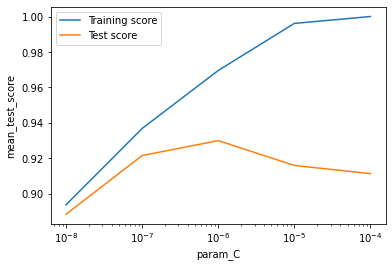

In [ ]:
sns.lineplot(data=df_cv, x='param_C', y='mean_train_score', label="Training score")
sns.lineplot(data=df_cv, x='param_C', y='mean_test_score', label="Test score")
plt.xscale('log');

For the RBF kernel, here's what we found:

In [ ]:
df_cv   = pd.DataFrame(clf.cv_results_)
df_cv = df_cv[df_cv['param_kernel']=='rbf']

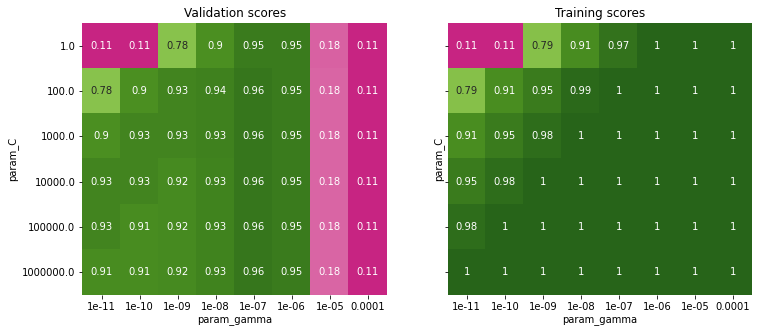

In [ ]:
plt.figure(figsize=(12,5))

ax1=plt.subplot(1,2,1)
pvt = pd.pivot_table(df_cv, values='mean_test_score', index='param_C', columns='param_gamma')
sns.heatmap(pvt, annot=True, cbar=False, vmin=0, vmax=1, cmap='PiYG');
plt.title("Validation scores");

ax2=plt.subplot(1,2,2, sharey=ax1)
plt.setp(ax2.get_yticklabels(), visible=False)
pvt = pd.pivot_table(df_cv, values='mean_train_score', index='param_C', columns='param_gamma')
sns.heatmap(pvt, annot=True, cbar=False, vmin=0, vmax=1, cmap='PiYG');
plt.title("Training scores");


We see that $\gamma$ and $C$ control the bias-variance tradeoff of the SVM model as follows.

* In the top left region, $C$ is small (the model is more regularized) and $\gamma$ is small (the kernel bandwidth is large). In this region, the model has more bias (is prone to underfit).
* On the right side (and we'd expect to see this on the bottom right if we extend the range of $C$ even higher), $C$ is large (the model is less regularized) and $\gamma$ is large (the kernel bandwidth is small. In this region, the model has more variance (is likely to overfit).

In the middle, we have a region of good combinations of $C$ and $\gamma$.

## Evaluate performance of the re-fitted model

We can see the "best" parameters, with which the model was re-fitted:

In [ ]:
print(clf.best_params_)

{'C': 100.0, 'gamma': 1e-07, 'kernel': 'rbf'}


And we can evaluate the re-fitted model on the test set. (Note that the `GridSearchCV` only used the training set; we have not used the test set at all for model fitting.)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
accuracy_score(y_pred, y_test)

0.96

Since the parameter grid above shows us the validation accuracy decreasing both as we increase each parameter and also as we decrease each parameter, we can be a bit more confident that we captured the point in the bias-variance surface where the error is smallest. 

(To be really thorough, we should probably try a larger range of $C$ for $\gamma$=`1e-7`, since we didn't reach the point where it starts to decrease again at large $C$.)


We also note that there are interactions between the $\gamma$ and $C$ parameters, since both control bias-variance. Therefore, to find the best combination of them, we should optimize them together.